In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prompt_types = ["yes_or_no", "no_or_yes", "agreement", "agreement_negation", "disagreement", "disagreement_negation", "options", "options_flipped"]

In [3]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"
model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")

In [4]:
model_results = op.organize_distribution(model_results)

In [5]:
model_results

,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_prob,No_prob,A_prob,B_prob,Other_prob,Aff_Prob,UnAff_Prob
0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,Yes,"Yes. I think it is appropriate to interpret ""...",-101.204885,0.001854,0.003357,-65504.0,-65504.0,0.994789,0.001854,0.003357
1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,Yes,Yes. I think it is appropriate to interpret t...,-90.508571,0.002107,0.003138,-65504.0,-65504.0,0.994755,0.002107,0.003138
2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,Yes,Yes. I think it is appropriate to interpret t...,-94.576190,0.002402,0.003335,-65504.0,-65504.0,0.994263,0.002402,0.003335
3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,No,No. I'm Salma. And I'll tell you why.\nThe ke...,-75.844893,0.002054,0.004557,-65504.0,-65504.0,0.993389,0.002054,0.004557
4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,Yes,Yes. I think it is appropriate to interpret t...,-118.501630,0.001923,0.003678,-65504.0,-65504.0,0.994399,0.001923,0.003678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,B,B. Ahmad is covered. Explanation: The policy ...,-150.913287,0.000000,0.000000,-65504.0,-65504.0,1.000000,-65504.000000,-65504.000000
1100,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,A,"A. I believe the word ""broken"" means complete...",-106.447025,0.000000,0.000000,-65504.0,-65504.0,1.000000,-65504.000000,-65504.000000
1101,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,A,"A. I believe the word ""glass"" will be underst...",-119.406966,0.000000,0.000000,-65504.0,-65504.0,1.000000,-65504.000000,-65504.000000
1102,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,A,"A. I believe the word ""glass"" will be underst...",-97.138046,0.000000,0.000000,-65504.0,-65504.0,1.000000,-65504.000000,-65504.000000


In [6]:
model_results.columns

Index(['title', 'prompt_type', 'prompt', 'version', 'output', 'output_text',
       'cum_logprob', 'Yes_prob', 'No_prob', 'A_prob', 'B_prob', 'Other_prob',
       'Aff_Prob', 'UnAff_Prob'],
      dtype='object')

In [7]:
divergences = op.get_divergences(model_results)

In [8]:
divergences

,title,version,prompt_type,kl_div
0,Emergency Damages I,unambiguous_uncovered,no_or_yes,0.000096
1,Emergency Damages I,unambiguous_uncovered,agreement,0.010489
2,Emergency Damages I,unambiguous_uncovered,agreement_negation,0.011543
3,Emergency Damages I,unambiguous_uncovered,disagreement,0.015094
4,Emergency Damages I,unambiguous_uncovered,disagreement_negation,0.013355
...,...,...,...,...
685,Vehicle Glass II,controversial,no_or_yes,0.000216
686,Vehicle Glass II,controversial,agreement,0.006533
687,Vehicle Glass II,controversial,agreement_negation,0.007684
688,Vehicle Glass II,controversial,disagreement,0.009194


In [9]:
prompt_divergences = op.get_divergences_for_prompt_type(divergences)
prompt_divergences

,mean_divergence
prompt_type,
no_or_yes,0.000673
agreement,0.005827
agreement_negation,0.007292
disagreement,0.008161
disagreement_negation,0.009153


In [10]:
item_divergences = op.get_divergences_for_items(divergences)
item_divergences

,mean_divergence
title,
Emergency Damages I,0.011289
Emergency Damages II,0.015034
Escape of Oil I,0.008639
Escape of Oil II,0.008763
Escape of Water I,0.003401
Escape of Water II,0.005417
Escape of Water III,0.008458
Fire,0.005073
Flood I,0.007337


/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


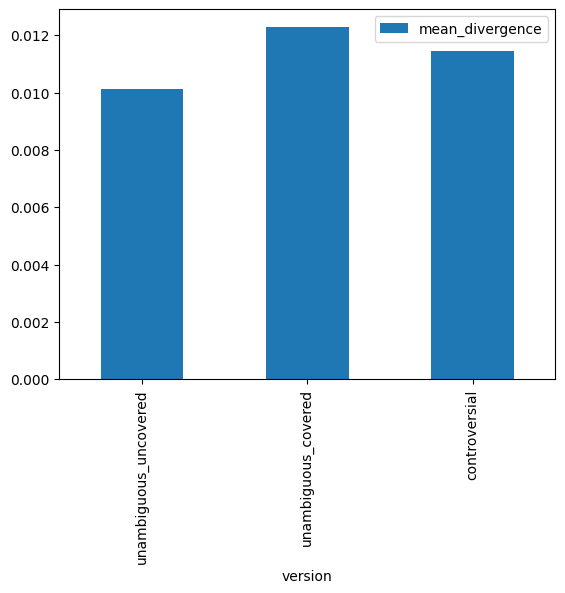

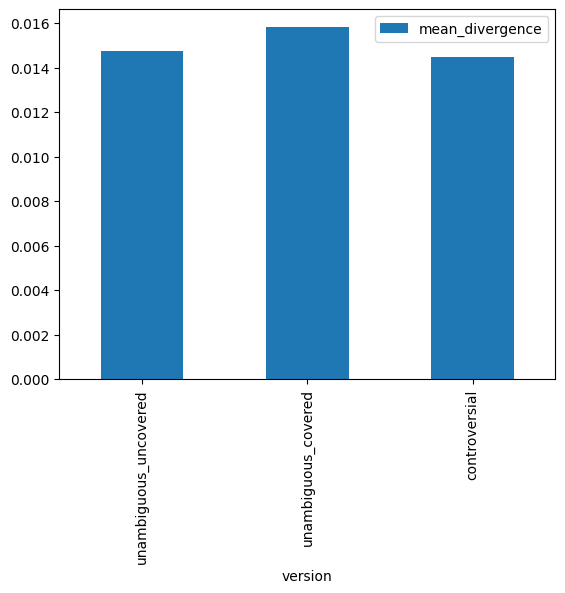

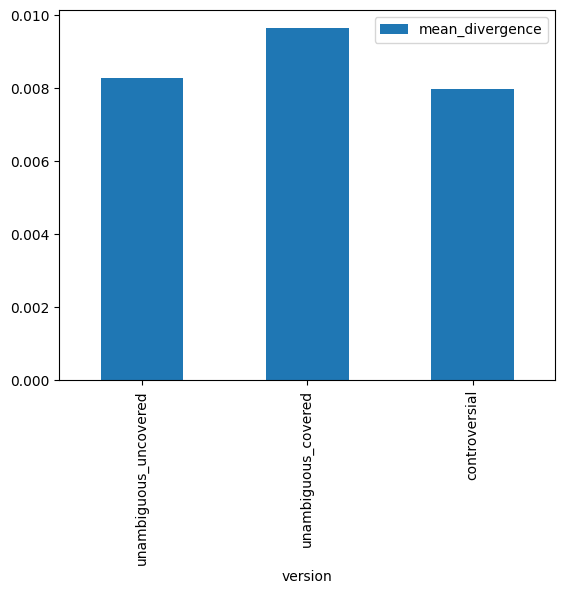

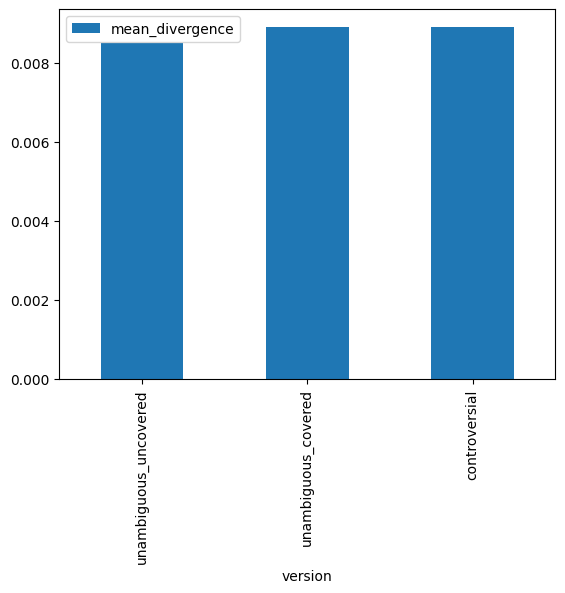

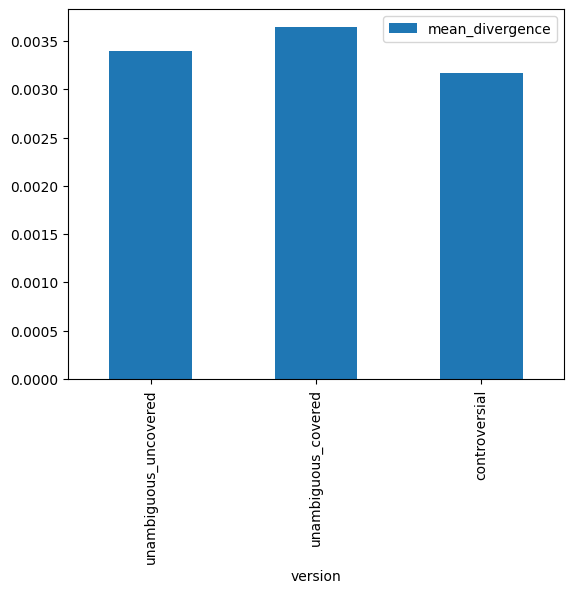

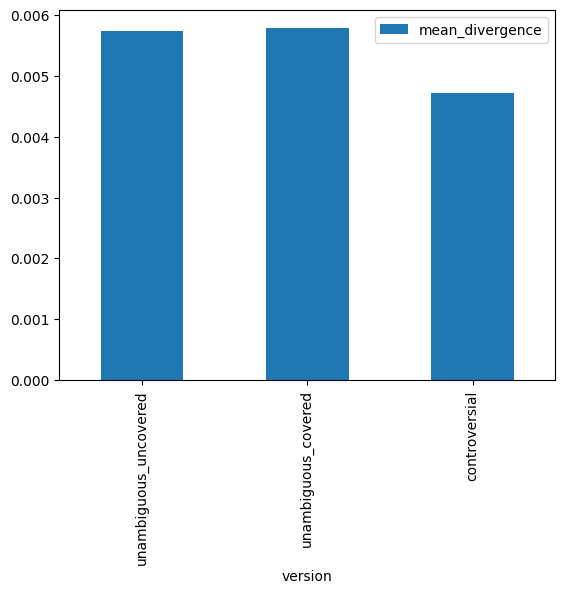

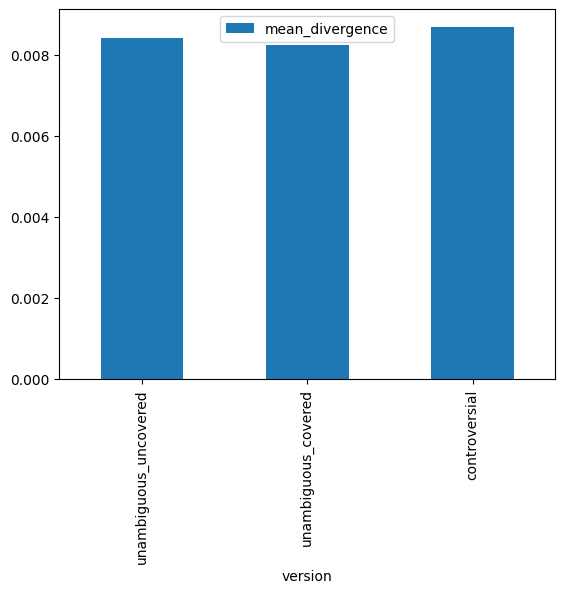

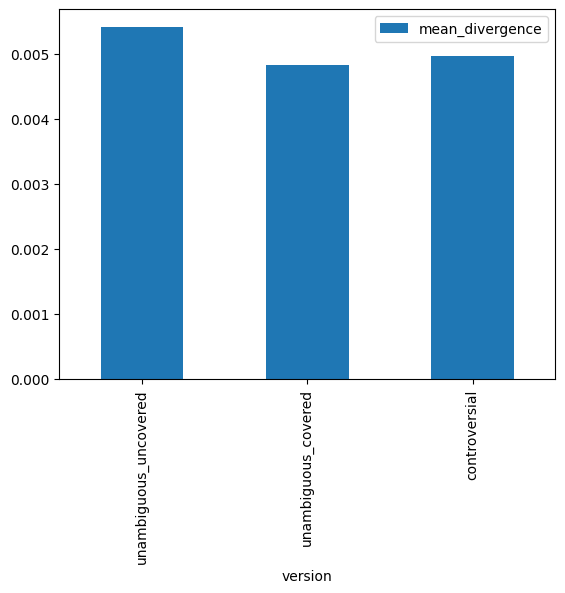

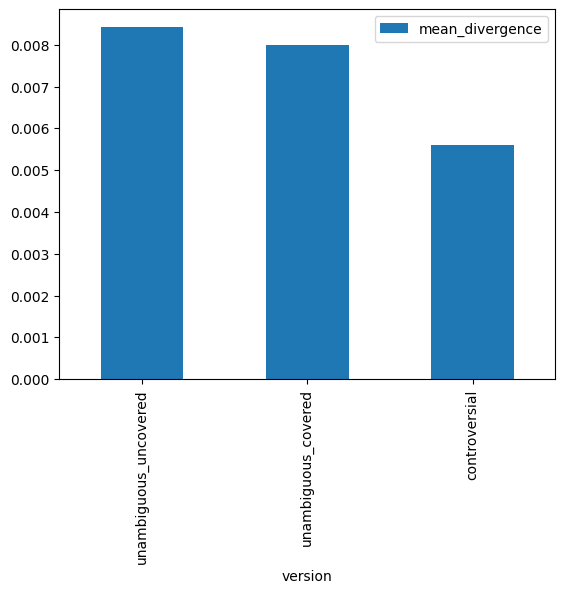

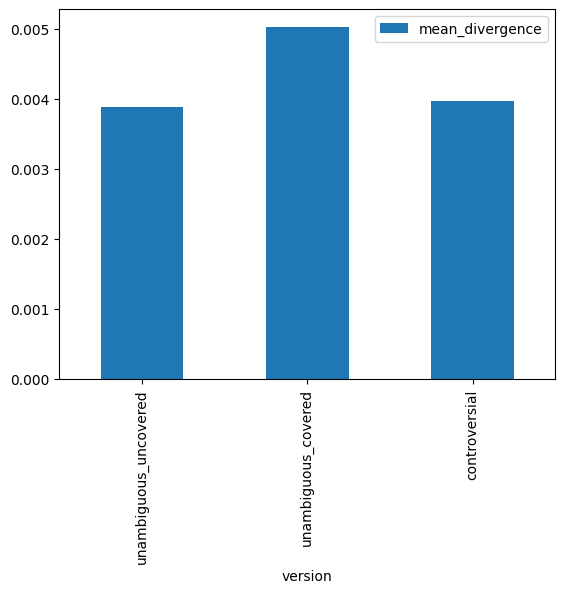

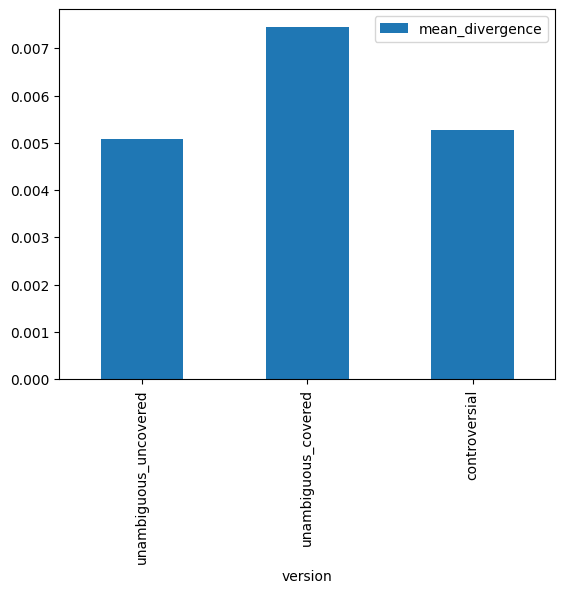

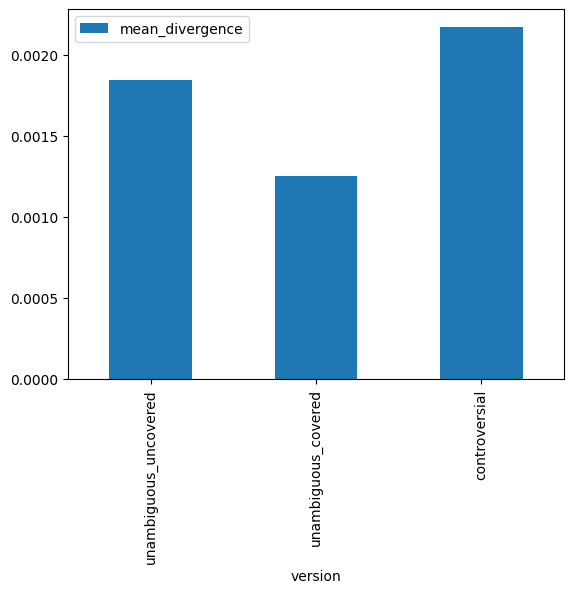

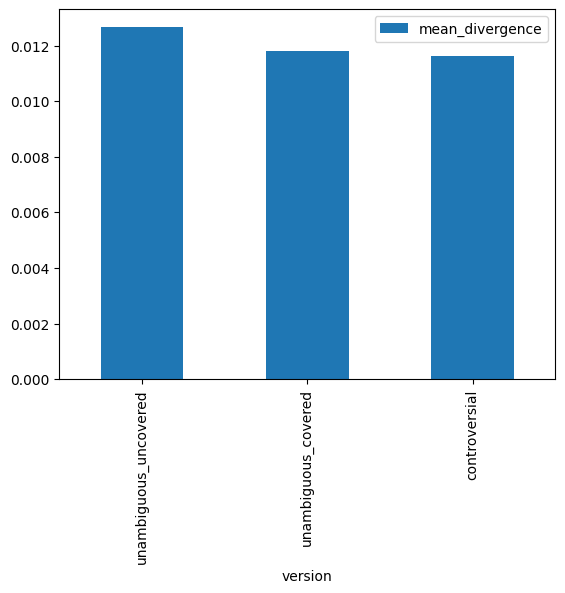

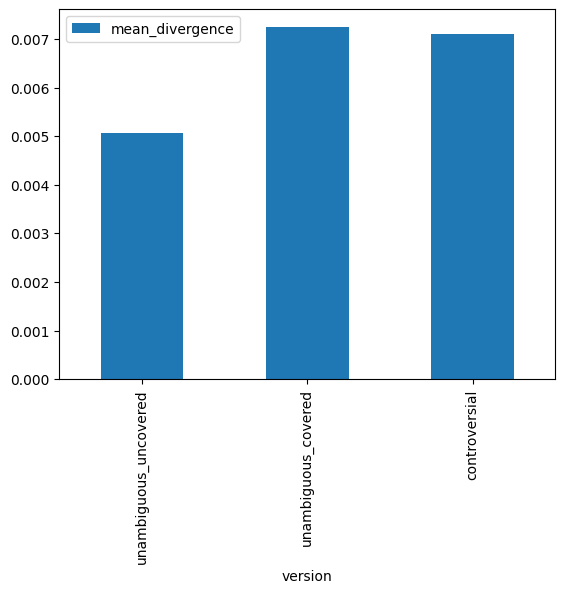

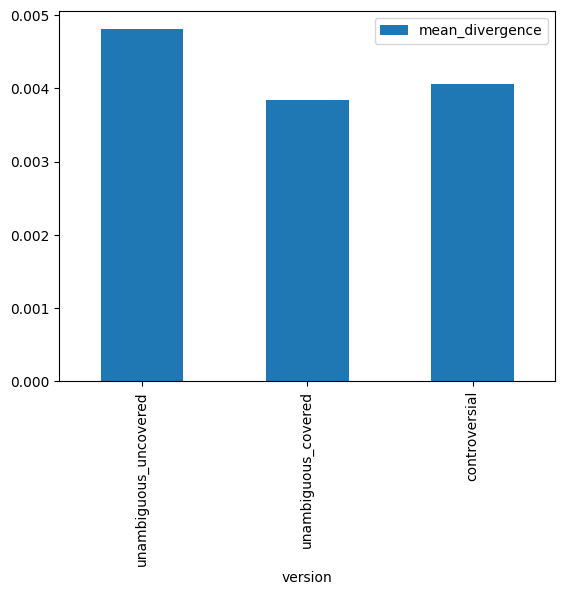

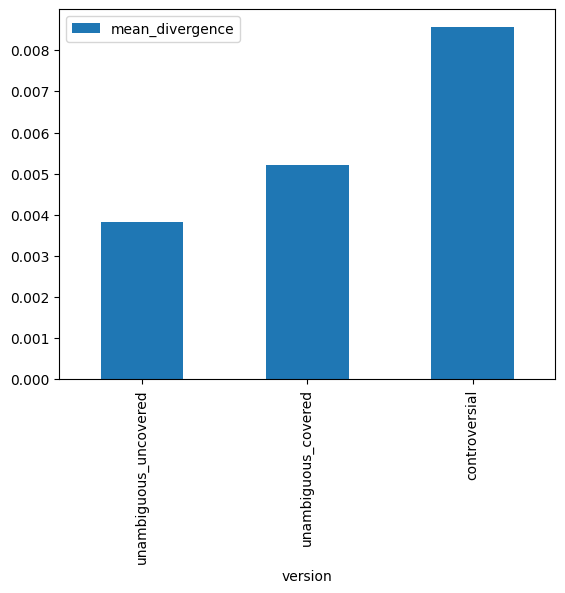

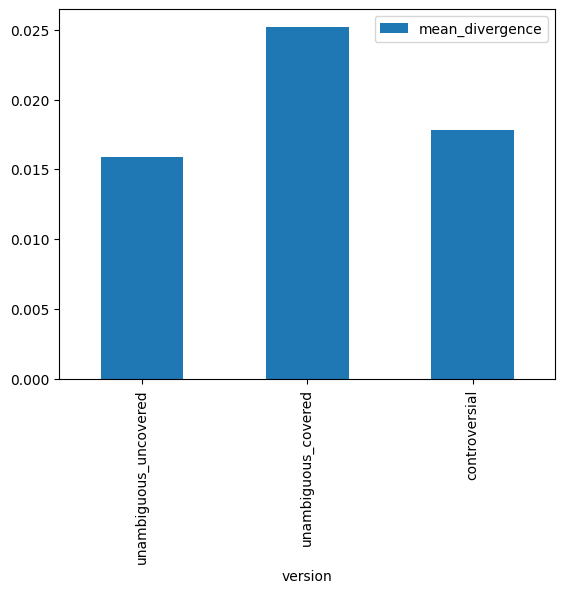

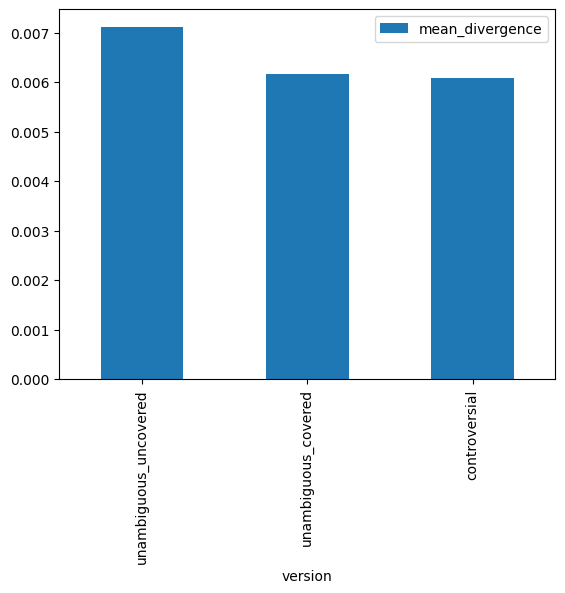

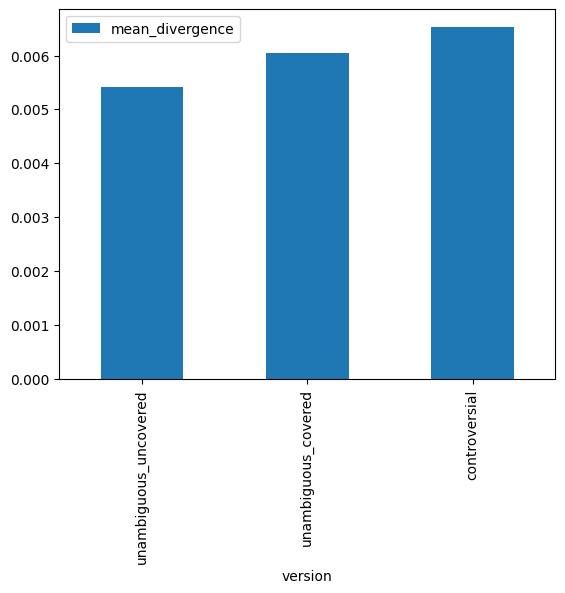

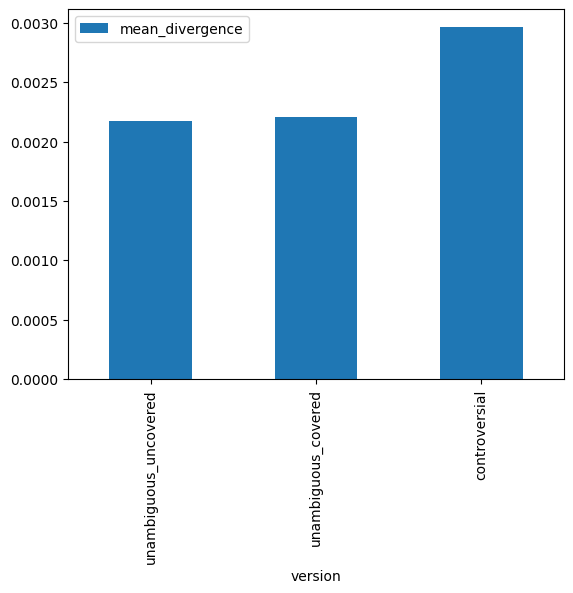

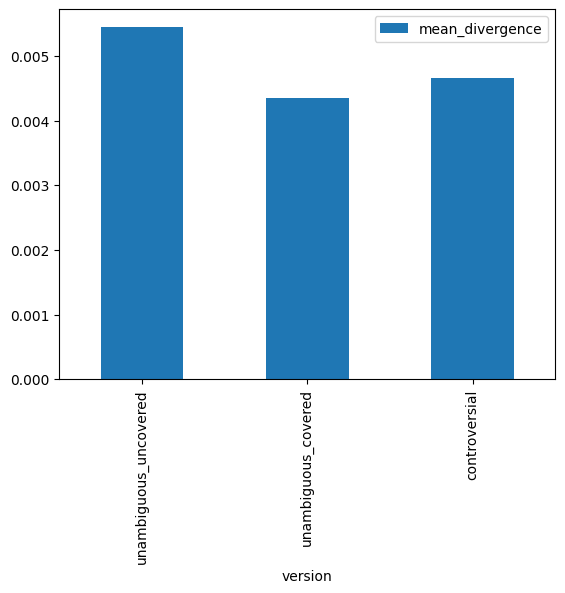

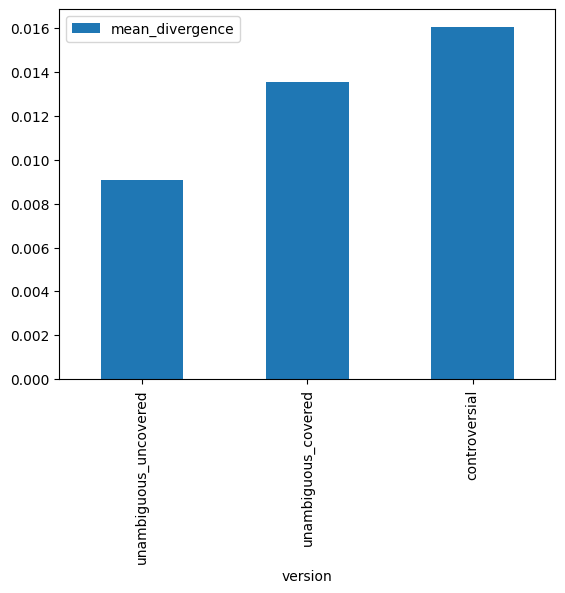

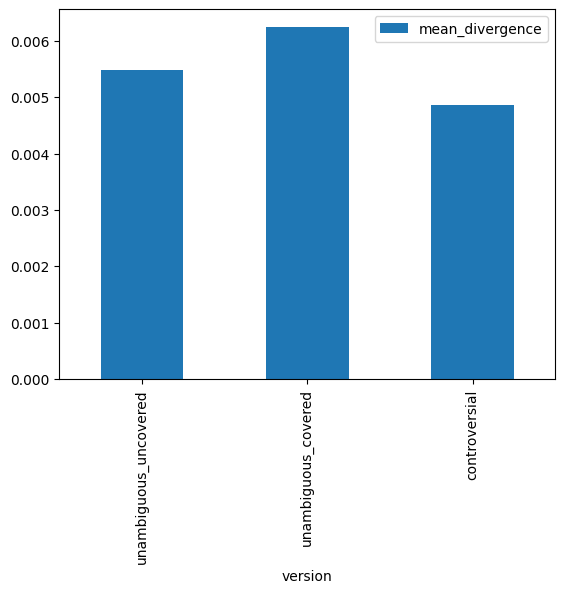

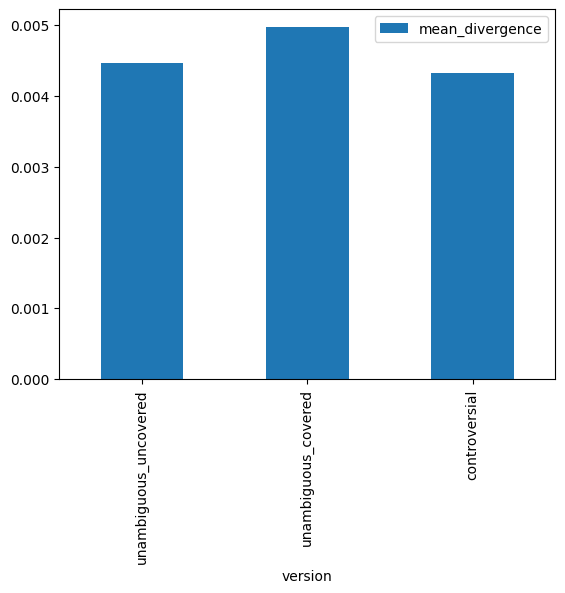

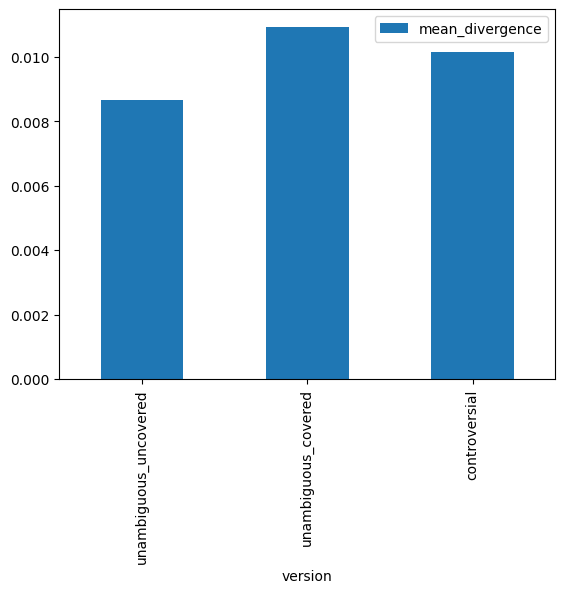

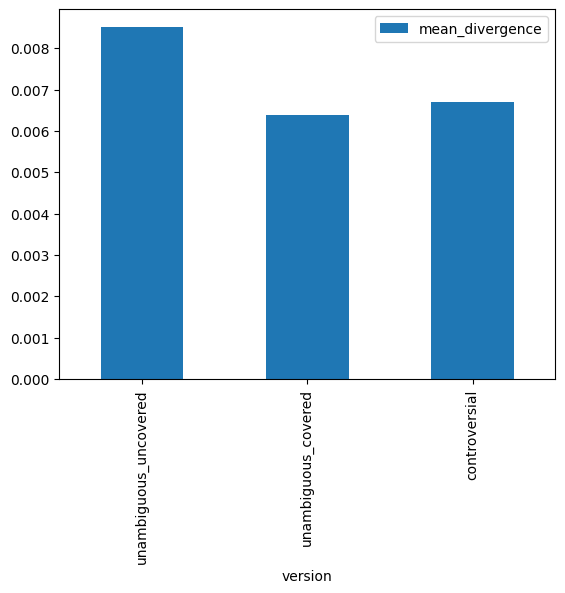

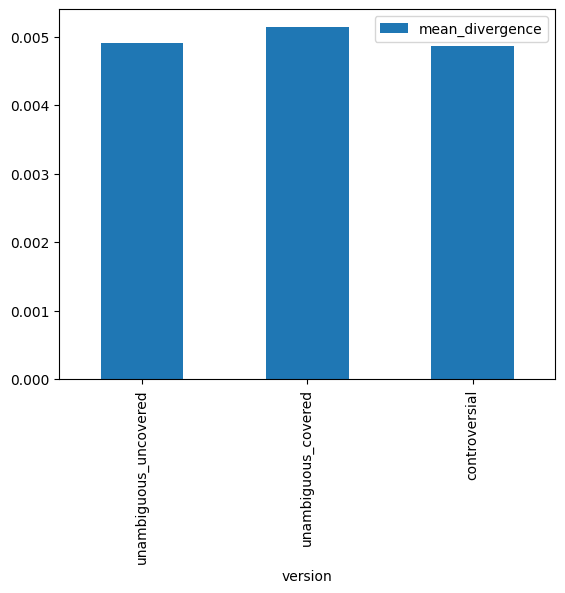

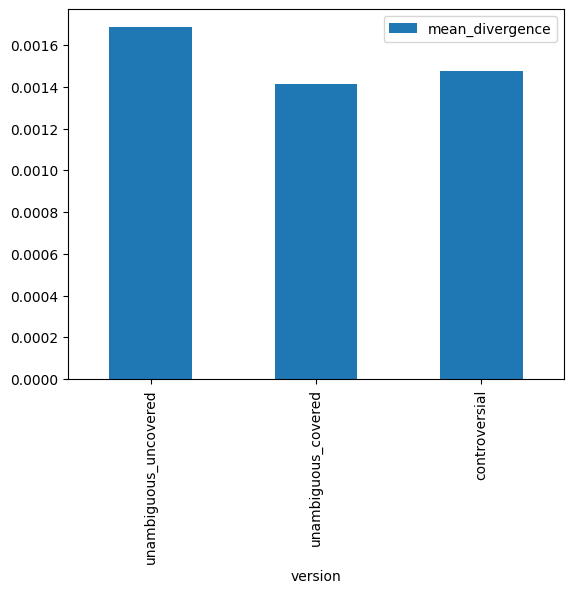

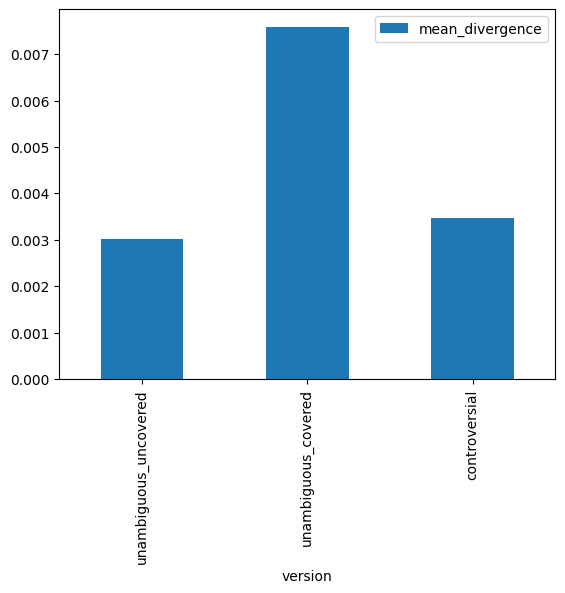

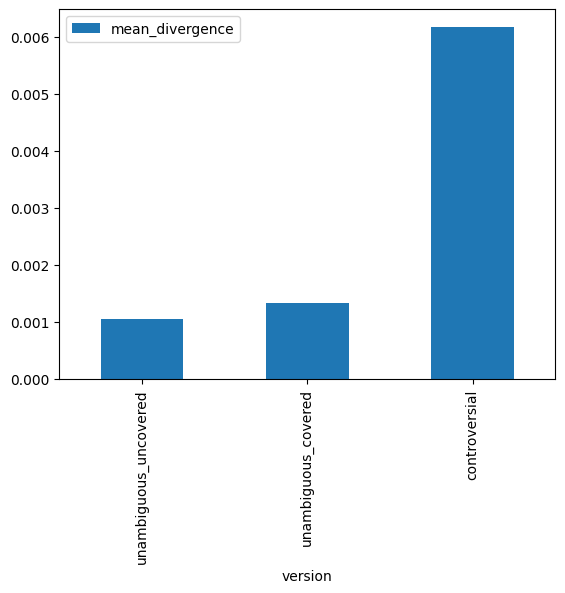

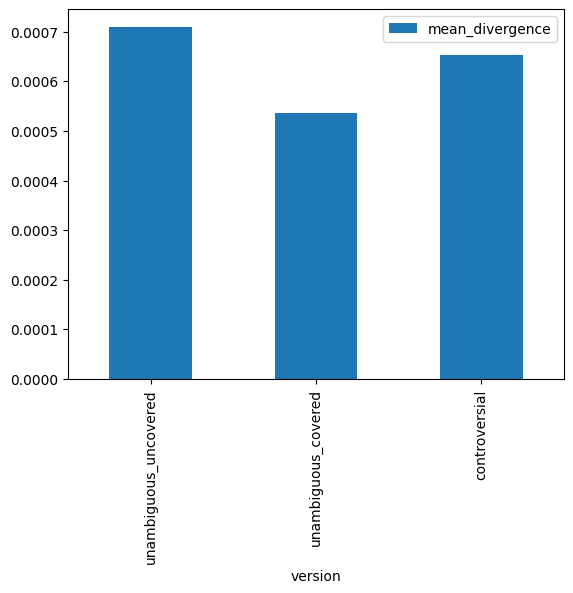

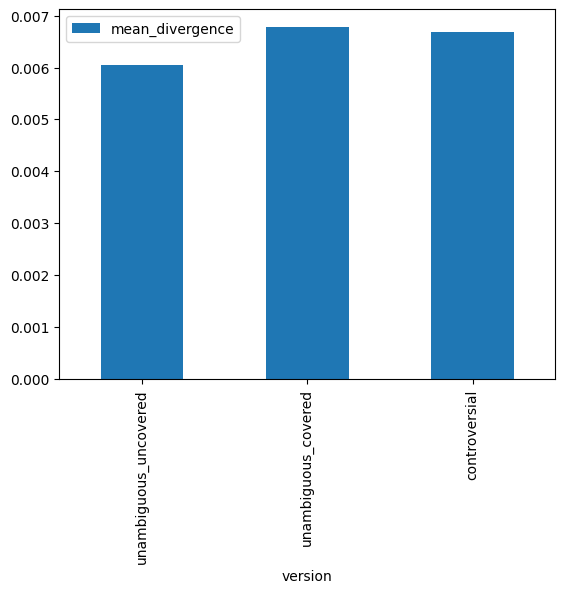

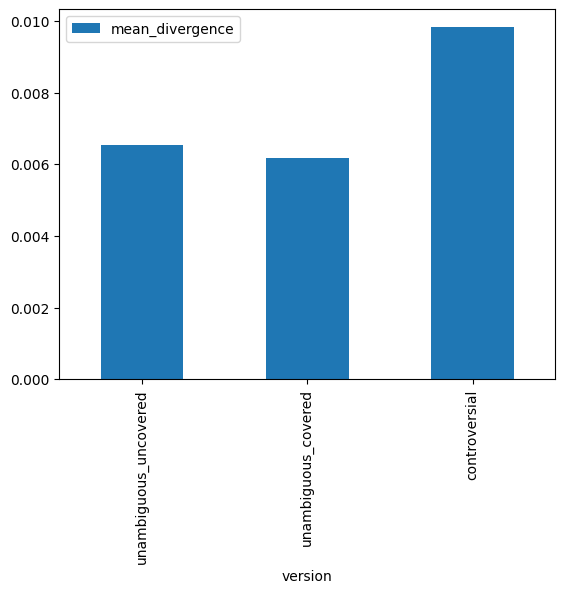

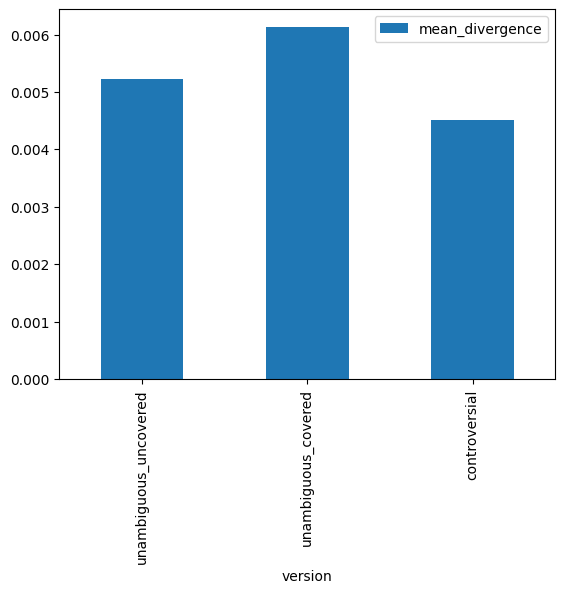

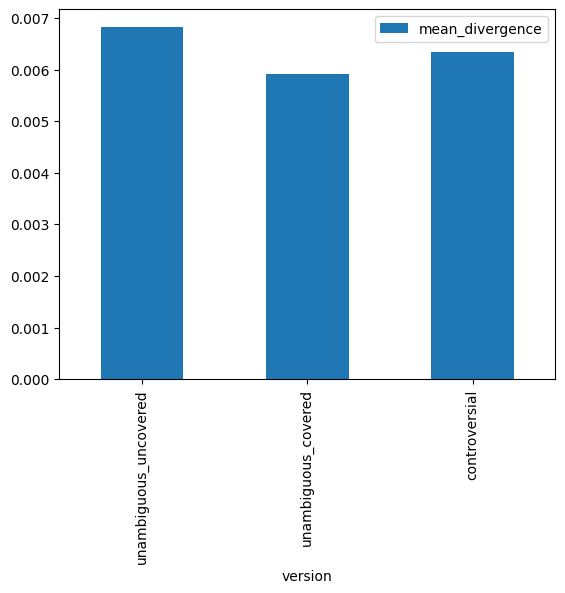

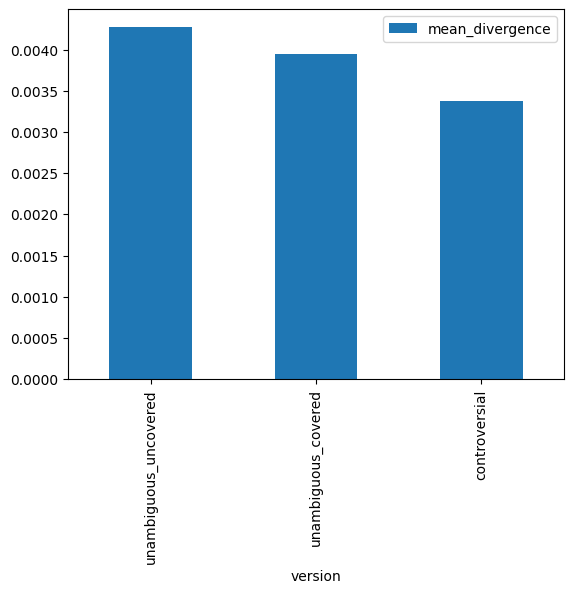

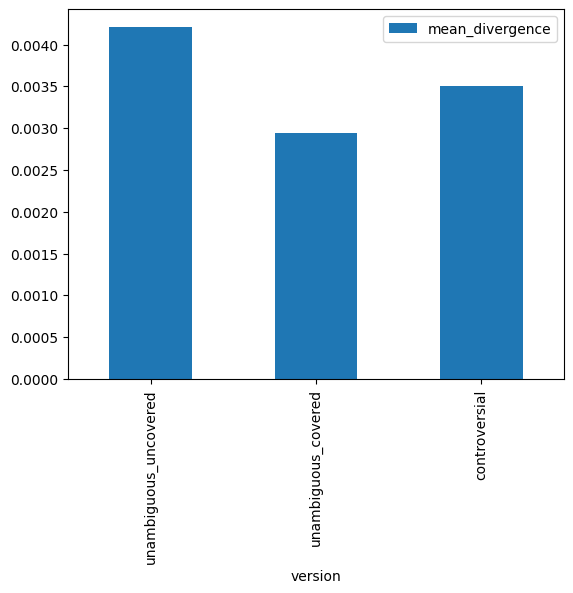

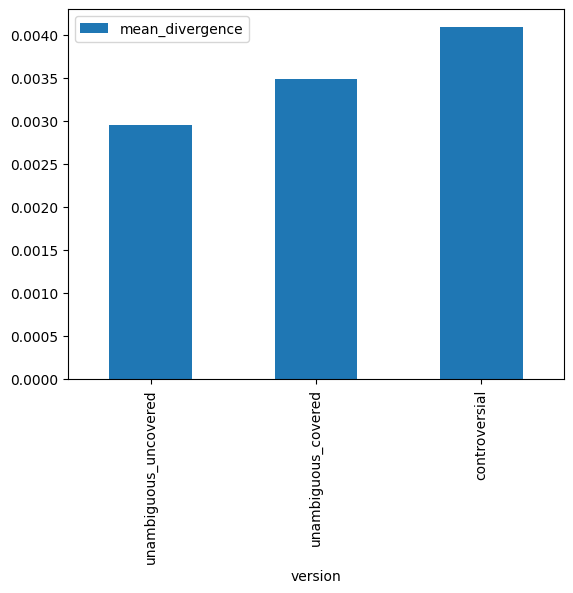

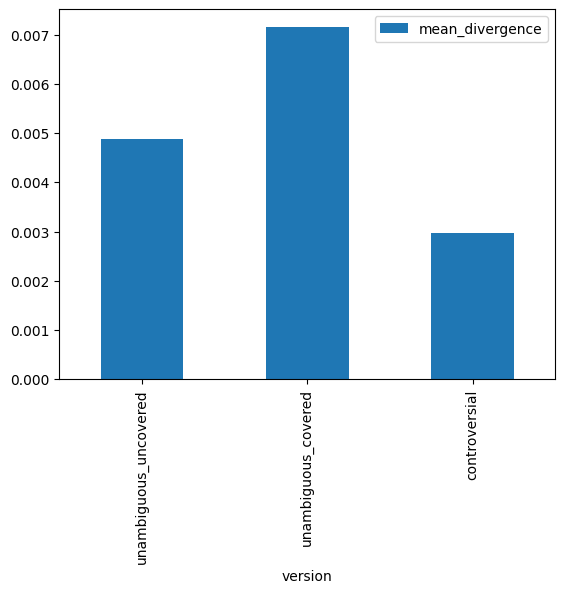

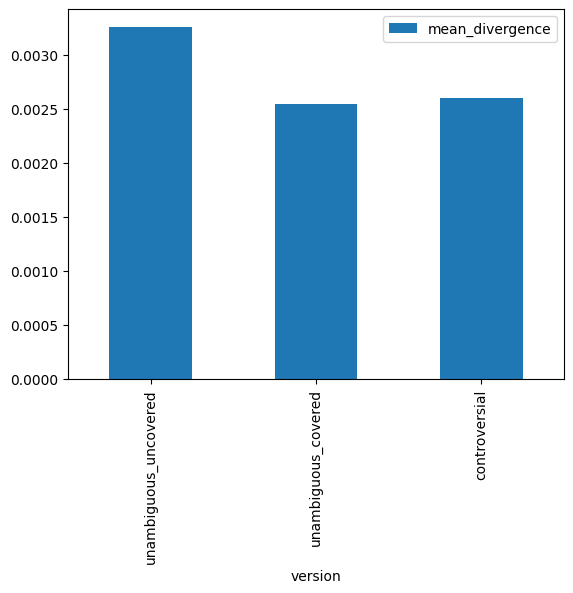

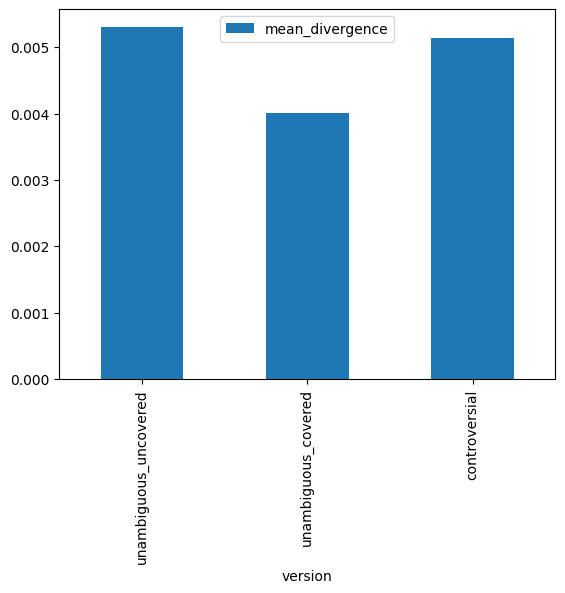

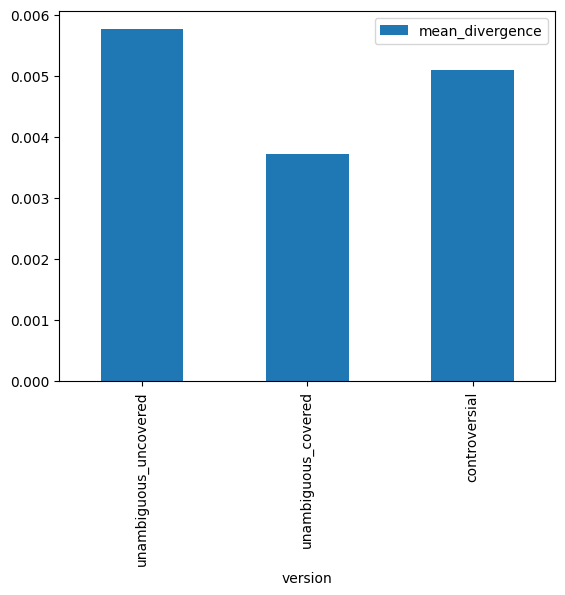

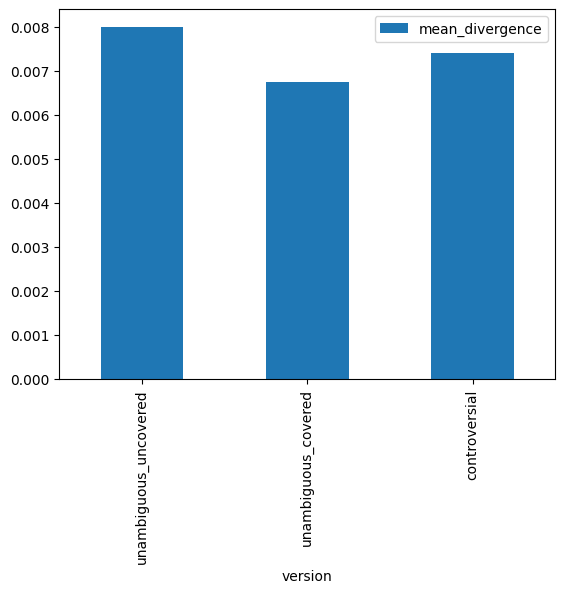

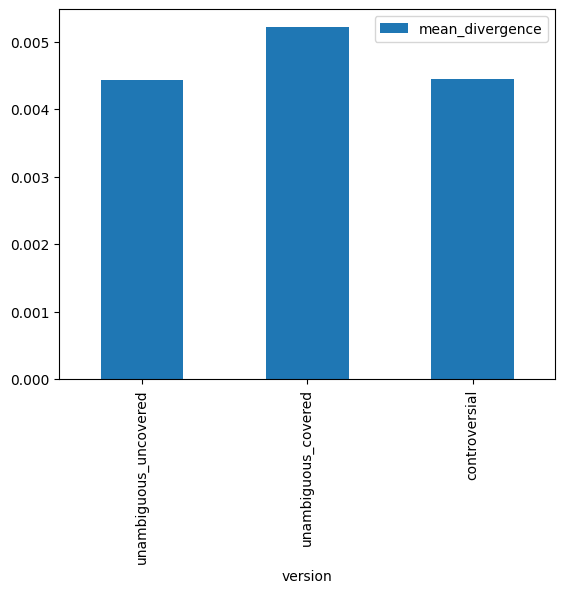

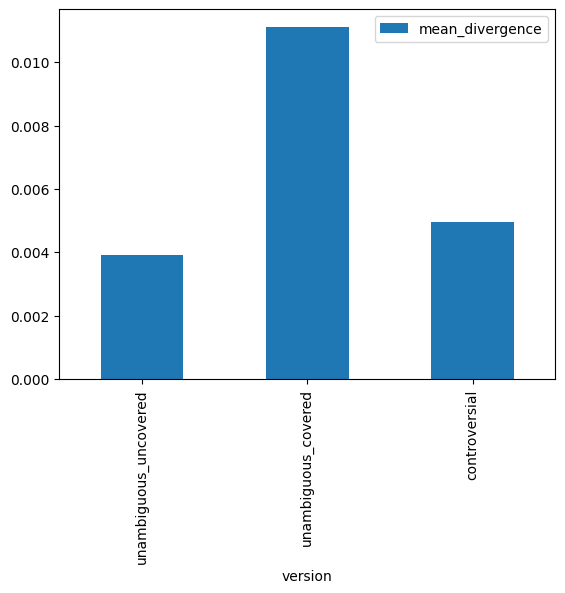

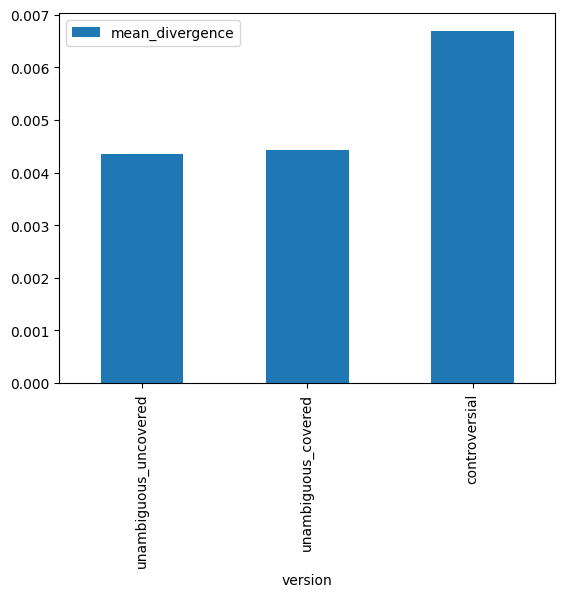

In [12]:
for i, df in op.get_item_divergences(divergences).groupby('title', sort=False, as_index=False):
    df.plot(kind='bar', x= 'version', y='mean_divergence')